In [ ]:
!pip install marimo

In [ ]:
# Initialization code that runs before all other cells
import marimo as mo
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

pd.set_option("display.max_columns", 500)
pd.set_option("display.max_colwidth", 30)
plt.style.use("seaborn-v0_8-whitegrid")

### Load data

In [ ]:
train_df = pd.read_csv("data/train.csv")
train_df["file_id"] = "train"

train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,file_id
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,train
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,train
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,train
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,train
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,train
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,train
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,train
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,train


In [ ]:
test_df = pd.read_csv("data/test.csv")
test_df["registered"] = 0
test_df["casual"] = 0
test_df["count"] = 0
test_df["file_id"] = "test"

test_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,registered,casual,count,file_id
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,0,0,test
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,0,0,0,test
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,0,0,0,test
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,0,0,0,test
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,0,0,0,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,0,0,0,test
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,0,0,0,test
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,0,0,0,test
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,0,0,0,test


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  file_id     10886 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.1+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
 9   registered  6493 non-null   int64  
 10  casual      6493 non-null   int64  
 11  count       6493 non-null   int64  
 12  file_id     6493 non-null   object 
dtypes: float64(3), int64(8), object(2)
memory usage: 659.6+ KB


In [ ]:
train_df.shape, test_df.shape

((10886, 13), (6493, 13))

In [ ]:
def rmsle_score(y_pred, y_true):
    diff = np.log(y_pred + 1) - np.log(y_true + 1)
    mean_error = np.square(diff).mean()
    return np.sqrt(mean_error)

In [ ]:
all_df = pd.concat([train_df, test_df])
all_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,file_id
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,train
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,train
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,train
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,train
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,train


### Simple analysis

In [ ]:
dt = pd.DatetimeIndex(all_df['datetime'])
all_df.set_index(dt, inplace=True)
all_df.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,file_id
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,train
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,train
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,train
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,train
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,train
2011-01-01 05:00:00,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,train
2011-01-01 06:00:00,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,train
2011-01-01 07:00:00,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,train
2011-01-01 08:00:00,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,train


In [ ]:
all_df.describe().round(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
mean,2.50,0.03,0.68,1.43,20.38,23.79,62.72,12.74,22.56,97.44,120.00
std,1.11,0.17,0.47,0.64,7.89,8.59,19.29,8.20,43.21,141.25,170.71
min,1.00,0.00,0.00,1.00,0.82,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,0.00,0.00,1.00,13.94,16.66,48.00,7.00,0.00,0.00,0.00
50%,3.00,0.00,1.00,1.00,20.50,24.24,63.00,13.00,3.00,23.00,28.00
75%,3.00,0.00,1.00,2.00,27.06,31.06,78.00,17.00,26.00,155.00,192.00
max,4.00,1.00,1.00,4.00,41.00,50.00,100.00,57.00,367.00,886.00,977.00


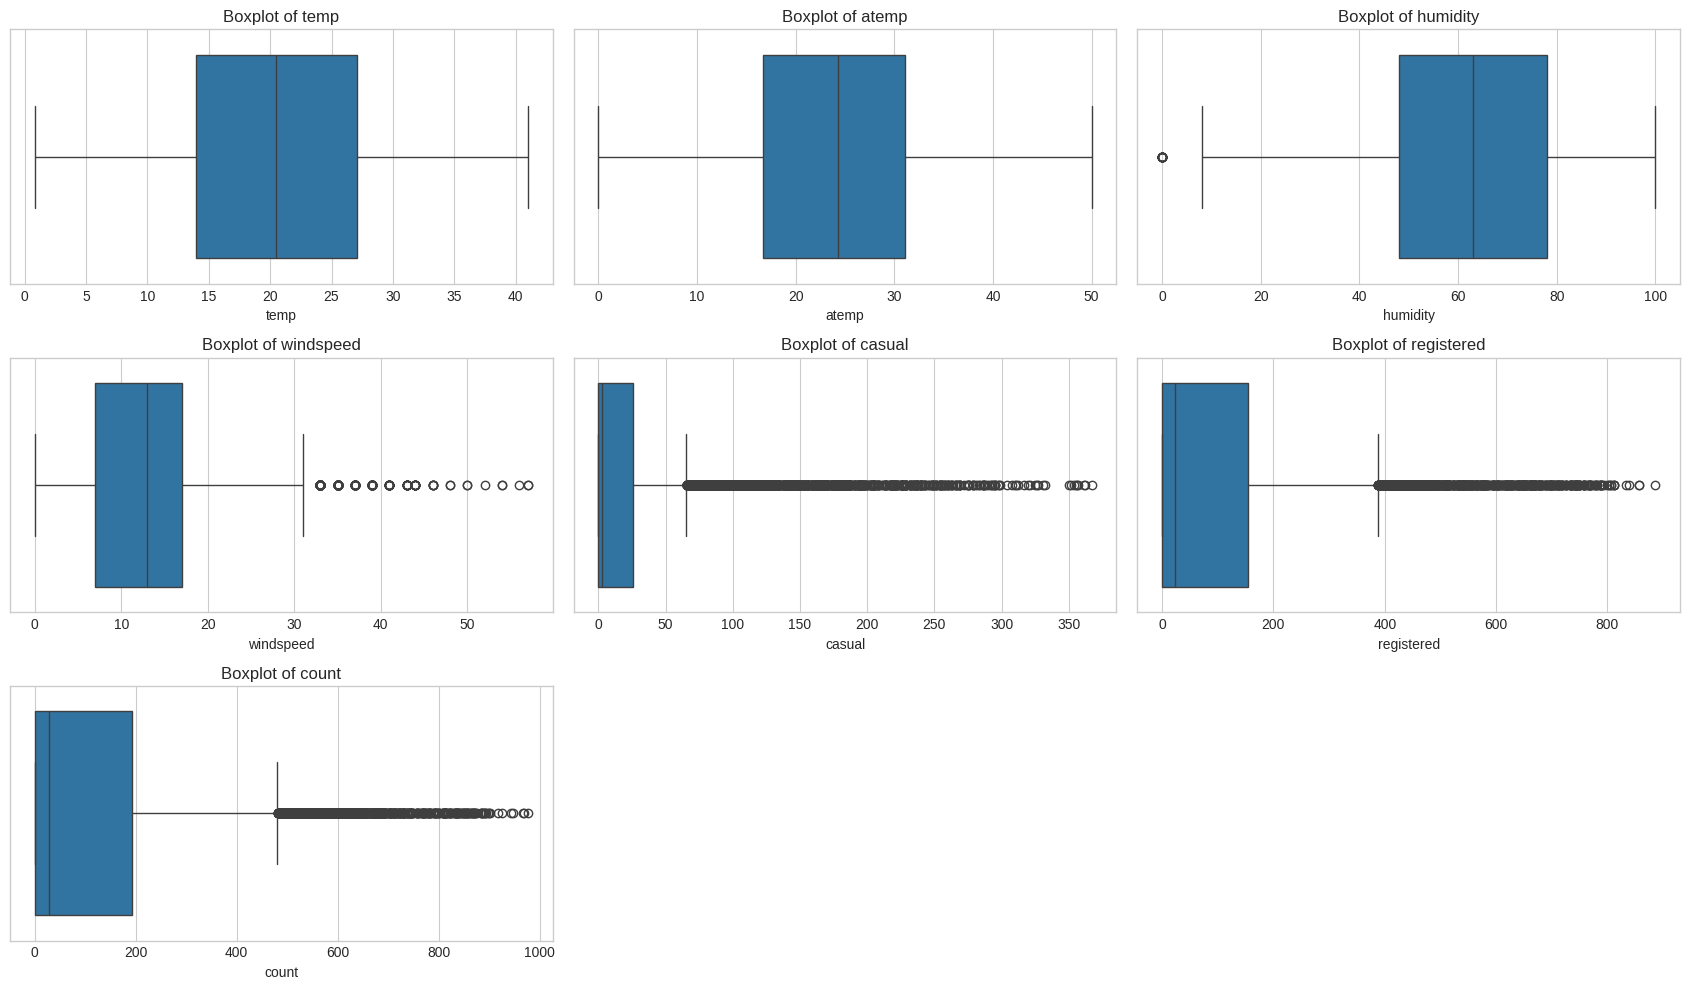

In [ ]:
def _():
    numeric_cols = [
        'temp',
        'atemp',
        'humidity',
        'windspeed',
        'casual',
        'registered',
        'count'
    ]

    plt.figure(figsize=(17, 10))
    for i, col in enumerate(numeric_cols):
        plt.subplot(3, 3, i+1)
        sns.boxplot(x=all_df[col])
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

_()

### Interpretation

- temperatures & humidity have no out outliers
- windspeed, casual, registered, count have lot of outliers

=> Apply log-transform to make outliers less influencial

In [ ]:
for _col in ['humidity', 'casual', 'registered', 'count', 'windspeed']:
    all_df[f'{_col}_log'] = np.log(all_df[_col] + 1)

all_df.describe().round(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,humidity_log,casual_log,registered_log,count_log,windspeed_log
count,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
mean,2.50,0.03,0.68,1.43,20.38,23.79,62.72,12.74,22.56,97.44,120.00,4.10,1.70,2.75,2.88,2.31
std,1.11,0.17,0.47,0.64,7.89,8.59,19.29,8.20,43.21,141.25,170.71,0.36,1.76,2.40,2.49,0.97
min,1.00,0.00,0.00,1.00,0.82,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,0.00,0.00,1.00,13.94,16.66,48.00,7.00,0.00,0.00,0.00,3.89,0.00,0.00,0.00,2.08
50%,3.00,0.00,1.00,1.00,20.50,24.24,63.00,13.00,3.00,23.00,28.00,4.16,1.39,3.18,3.37,2.64
75%,3.00,0.00,1.00,2.00,27.06,31.06,78.00,17.00,26.00,155.00,192.00,4.37,3.30,5.05,5.26,2.89
max,4.00,1.00,1.00,4.00,41.00,50.00,100.00,57.00,367.00,886.00,977.00,4.62,5.91,6.79,6.89,4.06


In [ ]:
# create basic time index features

all_df["date"] = dt.date
all_df["day"] = dt.day
all_df["month"] = dt.month
all_df["year"] = dt.year
all_df["hour"] = dt.hour
all_df["dow"] = dt.dayofweek

In [ ]:
all_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,file_id,humidity_log,casual_log,registered_log,count_log,windspeed_log,date,day,month,year,hour,dow
datetime,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,train,4.406719,1.386294,2.639057,2.833213,0.000000,2011-01-01,1,1,2011,0,5
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,train,4.394449,2.197225,3.496508,3.713572,0.000000,2011-01-01,1,1,2011,1,5
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,train,4.394449,1.791759,3.332205,3.496508,0.000000,2011-01-01,1,1,2011,2,5
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,train,4.330733,1.386294,2.397895,2.639057,0.000000,2011-01-01,1,1,2011,3,5
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,train,4.330733,0.000000,0.693147,0.693147,0.000000,2011-01-01,1,1,2011,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,0,0,0,test,4.110874,0.000000,0.000000,0.000000,2.485023,2012-12-31,31,12,2012,19,0
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,0,0,0,test,4.110874,0.000000,0.000000,0.000000,2.485023,2012-12-31,31,12,2012,20,0
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,0,0,0,test,4.110874,0.000000,0.000000,0.000000,2.485023,2012-12-31,31,12,2012,21,0


### Exploratory data analysis

In [ ]:
# plotly for fancy interactive figures uWu
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# count by day
def _():
    df = all_df[all_df['day'] < 19].groupby(
        all_df['date']
    )["count"].agg('mean').reset_index()

    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=df['date'],
        y=df['count'],
        name='Daily Bike Count',
    ))
    line=dict(color='#33CC99')

    fig.update_layout(
        title='Bike Sharing Trends over Time (Day < 19)',
        xaxis_title='Date',
        yaxis_title='Rental',
    )

    fig.show()

_()

In [ ]:
def _():

    df = all_df.copy()

    # Step 1: Aggregate the data
    df_avg = df.groupby(['hour', 'dow'])['count'].mean().reset_index()

    weekday_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
    df_avg['dow'] = df_avg['dow'].map(weekday_map)


    # Step 2: Plot with Plotly Express
    fig = px.line(
        df_avg,
        x='hour',
        y='count',
        color='dow',
        markers=True,
        title='Average count of bikes during weekdays and weekends'
    )

    # Step 3: Optional formatting
    fig.update_layout(
        xaxis=dict(
            range=[-1,24],
            tickmode='linear',
            dtick=1,
            title='Hour'
        ),
        yaxis_title='Average Count',
        width=720,
        height=400
    )

    fig.show()


_()

In [ ]:
def _():

    df = all_df.copy()

    # Step 1: Aggregate the data
    df_avg = df.groupby(['hour', 'dow'])['registered'].mean().reset_index()

    weekday_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
    df_avg['dow'] = df_avg['dow'].map(weekday_map)


    # Step 2: Plot with Plotly Express
    fig = px.line(
        df_avg,
        x='hour',
        y='registered',
        color='dow',
        markers=True,
        title='Average count of bikes during weekdays and weekends of registered users'
    )

    # Step 3: Optional formatting
    fig.update_layout(
        xaxis=dict(
            range=[-1,24],
            tickmode='linear',
            dtick=1,
            title='Hour'
        ),
        yaxis_title='Average Count',
        width=1200,
        height=600
    )

    fig.show()


_()

In [ ]:
def _():

    df = all_df.copy()

    # Step 1: Aggregate the data
    df_avg = df.groupby(['hour', 'dow'])['casual'].mean().reset_index()

    weekday_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
    df_avg['dow'] = df_avg['dow'].map(weekday_map)


    # Step 2: Plot with Plotly Express
    fig = px.line(
        df_avg,
        x='hour',
        y='casual',
        color='dow',
        markers=True,
        title='Average count of bikes during weekdays and weekends of casual users'
    )

    # Step 3: Optional formatting
    fig.update_layout(
        xaxis=dict(
            range=[-1,24],
            tickmode='linear',
            dtick=1,
            title='Hour'
        ),
        yaxis_title='Average Count',
        width=1200,
        height=600
    )

    fig.show()


_()

<Axes: title={'center': 'Count of bikes during seasons'}, xlabel='season', ylabel='count'>

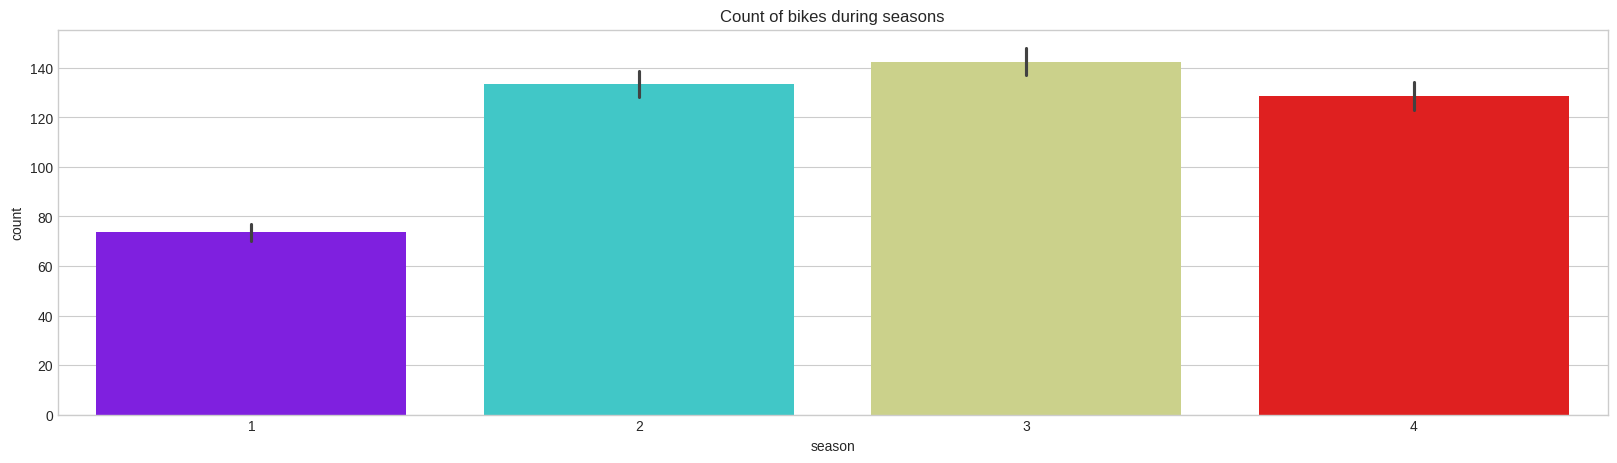

In [ ]:
_df = all_df.copy()

_fig, _ax = plt.subplots(figsize=(20,5))
sns.barplot(data=_df, x='season', y='count', hue='season', palette='rainbow', legend=False, ax=_ax)
_ax.set(title='Count of bikes during seasons')

_ax

<Axes: title={'center': 'Relation between humidity and users'}, xlabel='humidity', ylabel='count'>

<Figure size 1700x1000 with 0 Axes>

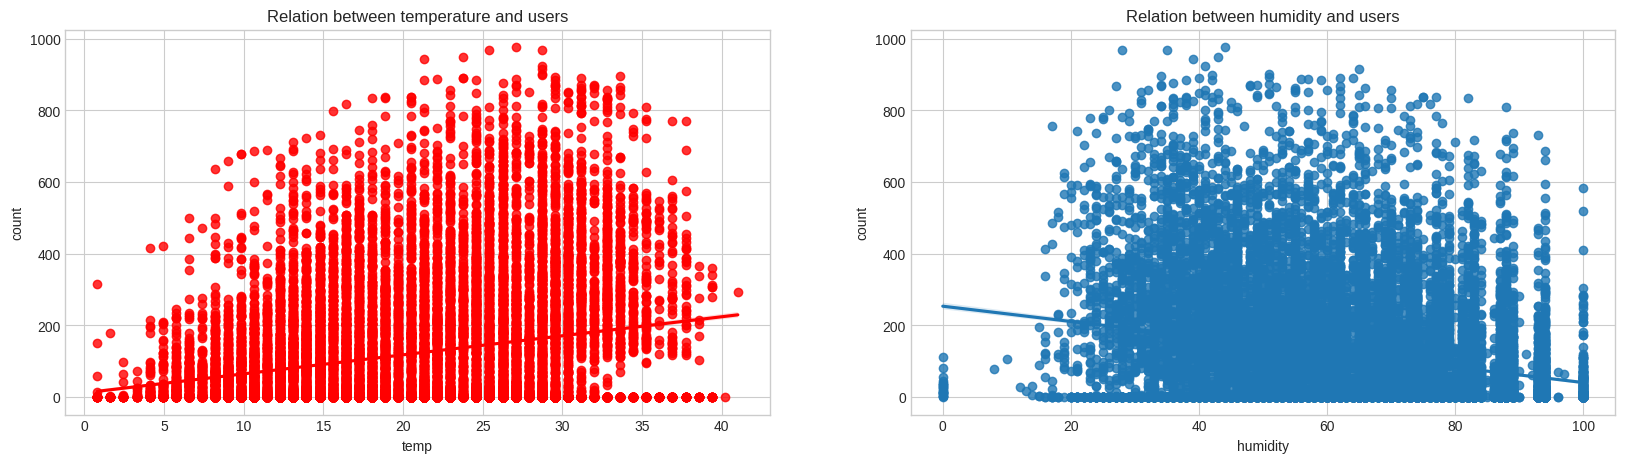

In [ ]:
_df = all_df.copy()

plt.figure(figsize=(17, 10))
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.regplot(x=_df['temp'], y=_df['count'], ax=ax1 ,color='red')
ax1.set(title="Relation between temperature and users")
sns.regplot(x=_df['humidity'], y=_df['count'], ax=ax2)
ax2.set(title="Relation between humidity and users")

fig.gca()

<Axes: >

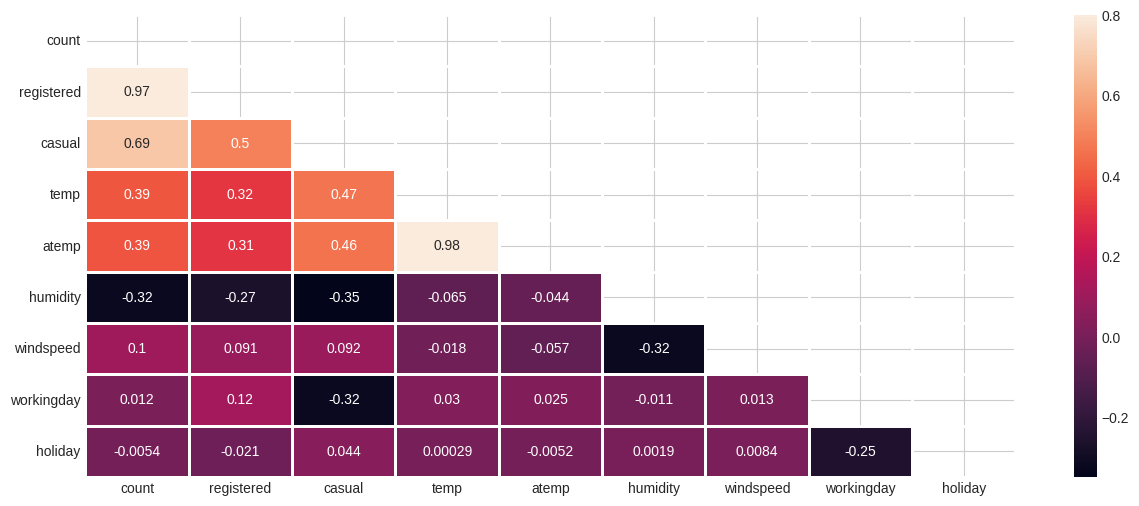

In [ ]:
_df = train_df[['count', 'registered', 'casual', 'temp', 'atemp', 'humidity', 'windspeed', 'workingday', 'holiday']]

corrMatt = _df.corr()
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
_fig, _ax = plt.subplots(figsize=(15, 6))
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=False, annot=True, ax=_ax, linewidths=1);

_ax

### Inferences from heatmap:

- Variable temp is positively correlated with dependent variables (casual is more compare to registered)

- Variable atemp is highly correlated with temp.

- Windspeed has lower correlation as compared to temp and humidity

# **Feature engineering**

**FEATURE CREATION**

In [ ]:
# feature engineer a new column whether its a peak hour or not

all_df["peak"] = all_df[["hour", "workingday"]].apply(
    lambda df: 1
    if (
        (df["workingday"] == 1 and (df["hour"] == 8 or 17 <= df["hour"] <= 18))
        or (df["workingday"] == 0 and 10 <= df["workingday"] <= 19)
    )
    else 0,
    axis=1,
)

# christmas and others
all_df["holiday"] = all_df[["month", "day", "holiday"]].apply(
    lambda df: 1
    if (df["month"] == 12 and df["day"] in [24, 26, 31])
    else df["holiday"],
    axis=1,
)

all_df["workingday"] = all_df[["month", "day", "workingday"]].apply(
    lambda df: 0 if df["month"] == 12 and df["day"] in [24, 31] else df["workingday"],
    axis=1,
)

# from histogram
all_df["ideal"] = all_df[["temp", "windspeed"]].apply(
    lambda df: 1 if (df["temp"] > 27 and df["windspeed"] < 30) else 0, axis=1
)

all_df["sticky"] = all_df[["humidity", "workingday"]].apply(
    lambda df: 1 if (df["workingday"] == 1 and df["humidity"] >= 60) else 0, axis=1
)

# circular encoding for capturing seasonal patterns
all_df["hour_sin"] = np.sin(2 * np.pi * all_df["hour"] / 24)
all_df["hour_cos"] = np.cos(2 * np.pi * all_df["hour"] / 24)

all_df["dayofweek_sin"] = np.sin(2 * np.pi * all_df["dow"] / 7)
all_df["dayofweek_cos"] = np.cos(2 * np.pi * all_df["dow"] / 7)

all_df["month_sin"] = np.sin(2 * np.pi * all_df["month"] / 12)
all_df["month_cos"] = np.cos(2 * np.pi * all_df["month"] / 12)

all_df["day_sin"] = np.sin(2 * np.pi * all_df["day"] / 30)
all_df["day_cos"] = np.cos(2 * np.pi * all_df["day"] / 30)

# lag feature
all_df['temp_lag_1'] = all_df['temp'].shift(1) # at time t-1
all_df['temp_lag_1'] = all_df['temp_lag_1'].fillna(0)
all_df['humidity_lag_24'] = all_df['humidity_log'].shift(24) # at same time yesterday
all_df['humidity_lag_24'] = all_df['humidity_lag_24'].fillna(0)
all_df['windspeed_lag_1'] = all_df['windspeed'].shift(1)
all_df['windspeed_lag_1'] = all_df['windspeed_lag_1'].fillna(0)


bins = [0, 6, 11, 14, 19, 23]
labels = ["Early Morning", "Morning", "Midday", "Afternoon", "Evening"]
all_df["time_of_day"] = pd.cut(all_df["hour"], bins=bins, labels=labels, right=True)
tod = pd.get_dummies(all_df["time_of_day"], prefix="tod", drop_first=True)

all_df_extras = pd.concat([all_df, tod], axis=1)
all_df_extras = pd.get_dummies(all_df_extras, columns=['season', 'holiday', 'workingday', 'weather'], drop_first=True)


In [ ]:
all_df_extras

,datetime,temp,atemp,humidity,windspeed,casual,registered,count,file_id,humidity_log,casual_log,registered_log,count_log,windspeed_log,date,day,month,year,hour,dow,peak,ideal,sticky,hour_sin,hour_cos,dayofweek_sin,dayofweek_cos,month_sin,month_cos,day_sin,day_cos,temp_lag_1,humidity_lag_24,windspeed_lag_1,time_of_day,tod_Morning,tod_Midday,tod_Afternoon,tod_Evening,season_2,season_3,season_4,holiday_1,workingday_1,weather_2,weather_3,weather_4
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,9.84,14.395,81,0.0000,3,13,16,train,4.406719,1.386294,2.639057,2.833213,0.000000,2011-01-01,1,1,2011,0,5,0,0,0,0.000000,1.000000,-0.974928,-0.222521,5.000000e-01,0.866025,0.207912,0.978148,0.00,0.000000,0.0000,NaN,False,False,False,False,False,False,False,False,False,False,False,False
2011-01-01 01:00:00,2011-01-01 01:00:00,9.02,13.635,80,0.0000,8,32,40,train,4.394449,2.197225,3.496508,3.713572,0.000000,2011-01-01,1,1,2011,1,5,0,0,0,0.258819,0.965926,-0.974928,-0.222521,5.000000e-01,0.866025,0.207912,0.978148,9.84,0.000000,0.0000,Early Morning,False,False,False,False,False,False,False,False,False,False,False,False
2011-01-01 02:00:00,2011-01-01 02:00:00,9.02,13.635,80,0.0000,5,27,32,train,4.394449,1.791759,3.332205,3.496508,0.000000,2011-01-01,1,1,2011,2,5,0,0,0,0.500000,0.866025,-0.974928,-0.222521,5.000000e-01,0.866025,0.207912,0.978148,9.02,0.000000,0.0000,Early Morning,False,False,False,False,False,False,False,False,False,False,False,False
2011-01-01 03:00:00,2011-01-01 03:00:00,9.84,14.395,75,0.0000,3,10,13,train,4.330733,1.386294,2.397895,2.639057,0.000000,2011-01-01,1,1,2011,3,5,0,0,0,0.707107,0.707107,-0.974928,-0.222521,5.000000e-01,0.866025,0.207912,0.978148,9.02,0.000000,0.0000,Early Morning,False,False,False,False,False,False,False,False,False,False,False,False
2011-01-01 04:00:00,2011-01-01 04:00:00,9.84,14.395,75,0.0000,0,1,1,train,4.330733,0.000000,0.693147,0.693147,0.000000,2011-01-01,1,1,2011,4,5,0,0,0,0.866025,0.500000,-0.974928,-0.222521,5.000000e-01,0.866025,0.207912,0.978148,9.84,0.000000,0.0000,Early Morning,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,10.66,12.880,60,11.0014,0,0,0,test,4.110874,0.000000,0.000000,0.000000,2.485023,2012-12-31,31,12,2012,19,0,0,0,0,-0.965926,0.258819,0.000000,1.000000,-2.449294e-16,1.000000,0.207912,0.978148,10.66,4.127134,8.9981,Afternoon,False,False,True,False,False,False,False,True,False,True,False,False
2012-12-31 20:00:00,2012-12-31 20:00:00,10.66,12.880,60,11.0014,0,0,0,test,4.110874,0.000000,0.000000,0.000000,2.485023,2012-12-31,31,12,2012,20,0,0,0,0,-0.866025,0.500000,0.000000,1.000000,-2.449294e-16,1.000000,0.207912,0.978148,10.66,3.871201,11.0014,Evening,False,False,False,True,False,False,False,True,False,True,False,False
2012-12-31 21:00:00,2012-12-31 21:00:00,10.66,12.880,60,11.0014,0,0,0,test,4.110874,0.000000,0.000000,0.000000,2.485023,2012-12-31,31,12,2012,21,0,0,0,0,-0.707107,0.707107,0.000000,1.000000,-2.449294e-16,1.000000,0.207912,0.978148,10.66,3.951244,11.0014,Evening,False,False,False,True,False,False,False,True,False,False,False,False


**FILTER METHOD**

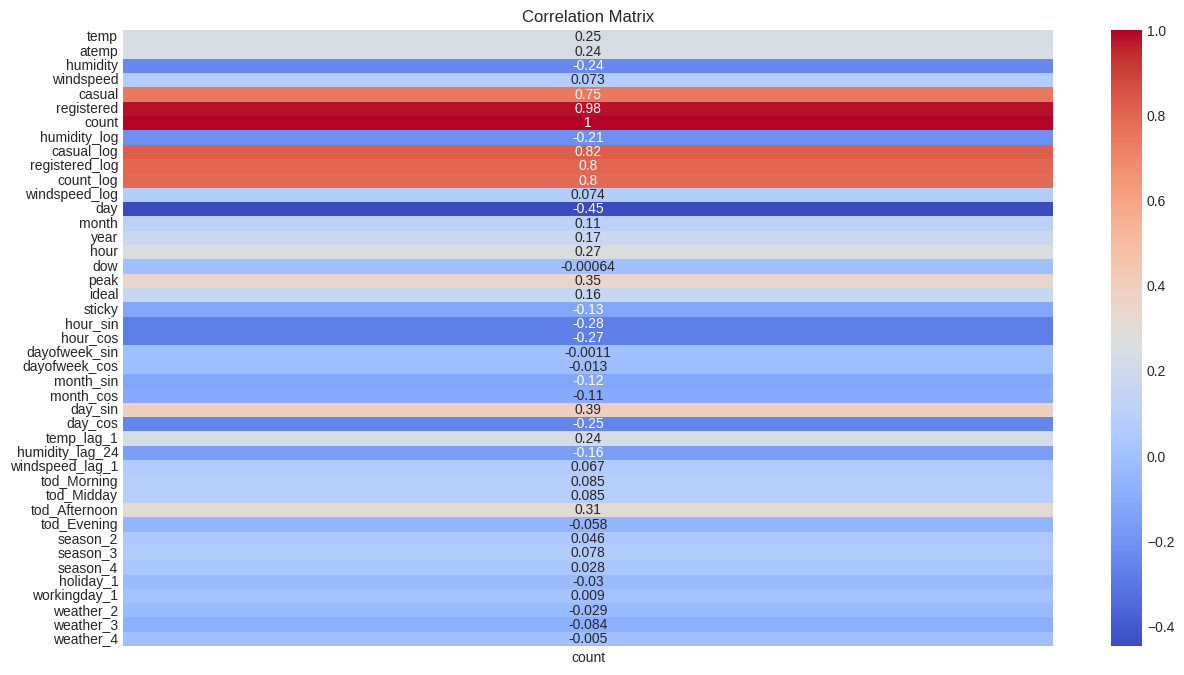

In [ ]:
corr_matrix = all_df_extras.corr(numeric_only=True)[['count']]
target_correlation = corr_matrix[['count']]

# Plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(target_correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



Separation of Components: casual and registered are inherently part of the target variable count (since count is computed as their sum), which is why they exhibit very high correlations with count. To avoid data leakage, however, these two variables will be separated and modeled independently rather than included directly in the training features.

Redundancy in Features: The features temp and atemp show very similar behavior and high correlation with one another, so one of them will be dropped to reduce redundancy and simplify the model.

Selected Features Based on Correlation: The features that show a significant relationship with the target variable (with correlation thresholds of > 0.1 or < -0.2) include:
temp, humidity, day, month, year, hour, peak, tod_Afternoon, ideal

Dropping Low-Correlation Features: Features that have nearly zero correlation with count will be dropped during the training stage, as they are unlikely to contribute meaningful predictive information.




**WRAPPER METHOD**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

exclude_cols = [
    'datetime', 'date', 'atemp',
    'registered_log', 'casual_log', 'count_log',
    'registered', 'casual', 'count',
    'file_id', 'time_of_day'
]
input_cols = [col for col in all_df_extras.columns if col not in exclude_cols]


X = all_df_extras[input_cols].values
y = all_df_extras['count'].values


selected_features = []


num_features_to_select = 10

model = RandomForestRegressor(n_estimators=100, random_state=42)

while len(selected_features) < num_features_to_select:
    best_score = -np.inf
    best_feature = None

    for feature_idx in range(X.shape[1]):
        if feature_idx in selected_features:
            continue

        candidate_features = selected_features + [feature_idx]

        scores = cross_val_score(
            model,
            X[:, candidate_features],
            y,
            cv=5,
            scoring='r2'
        )
        mean_score = np.mean(scores)

        if mean_score > best_score:
            best_score = mean_score
            best_feature = feature_idx

    if best_feature is not None:
        selected_features.append(best_feature)
        print(f"Selected Feature {len(selected_features)}: '{input_cols[best_feature]}' with mean R^2 = {best_score:.4f}")

selected_feature_names = [input_cols[i] for i in selected_features]
print("Final selected features:", selected_feature_names)


Selected Feature 1: 'day' with mean R^2 = 0.1575
Selected Feature 2: 'hour' with mean R^2 = 0.4840
Selected Feature 3: 'peak' with mean R^2 = 0.5193
Selected Feature 4: 'temp' with mean R^2 = 0.5658
Selected Feature 5: 'humidity' with mean R^2 = 0.6015
Selected Feature 6: 'sticky' with mean R^2 = 0.6296
Selected Feature 7: 'dayofweek_cos' with mean R^2 = 0.6485
Selected Feature 8: 'weather_3' with mean R^2 = 0.6592
Selected Feature 9: 'windspeed' with mean R^2 = 0.6645
Selected Feature 10: 'day_sin' with mean R^2 = 0.6666
Final selected features: ['day', 'hour', 'peak', 'temp', 'humidity', 'sticky', 'dayofweek_cos', 'weather_3', 'windspeed', 'day_sin']


# **EMBEDED METHOD**

In [ ]:
def get_rmsle(y_pred, y_actual):
    diff = np.log(y_pred + 1) - np.log(y_actual+1)
    mean_error = np.square(diff).mean()
    return np.sqrt(mean_error)

In [ ]:
def custom_train_valid_split(data, cutoff_day=15):
    train = data[data["day"] <= cutoff_day]
    valid = data[data["day"] > cutoff_day]
    return train, valid

In [ ]:
def prep_train_data(data, input_cols):
    X = data[input_cols].values
    y_r = data["registered_log"].values
    y_c = data["casual_log"].values

    return X, y_r, y_c

In [ ]:
train = all_df_extras[all_df_extras["file_id"] == "train"]
test = all_df_extras[all_df_extras["file_id"] == "test"]

In [ ]:

# --- Define input features ---
exclude_cols = [
    'datetime',
    'date',
    'atemp', # high correlation with temp
    'registered_log',
    'casual_log',
    'count_log',
    'registered',
    'casual',
    'count',
    'file_id',
    'time_of_day',
]
input_cols = [col for col in all_df_extras.columns if col not in exclude_cols]

# --- Split and prepare data ---
train_part, valid_part = custom_train_valid_split(train)
print(train_part.shape, valid_part.shape)

X_train, y_train_r, y_train_c = prep_train_data(train_part, input_cols)
X_valid, y_valid_r, y_valid_c = prep_train_data(valid_part, input_cols)
X_test = test[input_cols].values

# --- Baseline models ---
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}
feature_importance = {}

for name, model in models.items():
    # Registered model
    model.fit(X_train, y_train_r)
    pred_r_valid = np.exp(model.predict(X_valid)) - 1
    pred_r_train = np.exp(model.predict(X_train)) - 1

    rmsle_r_valid = get_rmsle(pred_r_valid, np.exp(y_valid_r)-1)
    rmsle_r_train = get_rmsle(pred_r_train, np.exp(y_train_r)-1)

    # Casual model
    model.fit(X_train, y_train_c)
    pred_c_valid = np.exp(model.predict(X_valid)) - 1
    pred_c_train = np.exp(model.predict(X_train)) - 1

    rmsle_c_valid = get_rmsle(pred_c_valid, np.exp(y_valid_c)-1)
    rmsle_c_train = get_rmsle(pred_c_train, np.exp(y_train_c) - 1)

    # Combine register + casual
    pred_comb_valid = np.round(pred_r_valid + pred_c_valid)
    pred_comb_train = np.round(pred_r_train + pred_c_train)

    pred_comb_valid[pred_comb_valid < 0] = 0
    pred_comb_train[pred_comb_train < 0] = 0

    actual_comb_valid = np.exp(y_valid_r) + np.exp(y_valid_c) - 2
    actual_comb_train = np.exp(y_train_r) + np.exp(y_train_c) - 2

    rmsle_count_valid = get_rmsle(pred_comb_valid, actual_comb_valid)
    rmsle_count_train = get_rmsle(pred_comb_train, actual_comb_train)

    results[name] = {
        "rmsle_r_train": rmsle_r_train,
        "rmsle_r_valid": rmsle_r_valid,
        "rmsle_c_train": rmsle_c_train,
        "rmsle_c_valid": rmsle_c_valid,
        "rmsle_count_train": rmsle_count_train,
        "rmsle_count_valid": rmsle_count_valid
    }

    if hasattr(model, "feature_importances_"):
        feature_importance[name] = sorted(
            zip(input_cols, model.feature_importances_),
            key=lambda x: -x[1]
        )

# --- Print results ---
results_df = pd.DataFrame(results).T.sort_values("rmsle_count_valid")
print("Model Performance (RMSLE):\n", results_df)

# --- Interpret feature importance ---
for model_name in ['DecisionTree', 'RandomForest']:
    if model_name in feature_importance:
        print(f"\nFeature importance for {model_name}:")
        for feat, score in feature_importance[model_name][:10]:  # top 10
            print(f"{feat:<25} {score:.4f}")


(8600, 47) (2286, 47)
Model Performance (RMSLE):
                   rmsle_r_train  rmsle_r_valid  rmsle_c_train  rmsle_c_valid  \
RandomForest       1.129761e-01       0.318743   1.779808e-01       0.549916   
DecisionTree       2.271497e-17       0.464661   1.311450e-17       0.767488   
LinearRegression   6.881411e-01       0.687975   6.367324e-01       0.663382   

                  rmsle_count_train  rmsle_count_valid  
RandomForest           1.144763e-01           0.326167  
DecisionTree           3.517359e-16           0.452981  
LinearRegression       6.651763e-01           0.662824  

Feature importance for DecisionTree:
hour                      0.4920
temp                      0.2213
workingday_1              0.0486
humidity                  0.0363
hour_cos                  0.0239
hour_sin                  0.0219
temp_lag_1                0.0165
month                     0.0156
humidity_lag_24           0.0129
tod_Evening               0.0129

Feature importance for RandomFor

Baseline models can already achieve very good scores just from good feature engineering. But seem like we suffer from overfitting

In [ ]:

def _():
    selected_features = [
        'hour',
        'temp',
        'workingday_1',
        'humidity_log',
        'hour_cos',
        'hour_sin',
        'temp_lag_1',
        'month',
        'humidity_lag_24',
        'windspeed',
    ]



    X_train, y_train_r, y_train_c = prep_train_data(train_part, selected_features)
    X_valid, y_valid_r, y_valid_c = prep_train_data(valid_part, selected_features)
    X_test = test[selected_features].values


    models = {
        "LinearRegression": LinearRegression(),
        "DecisionTree": DecisionTreeRegressor(random_state=42),
        "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42)
    }

    results = {}

    for name, model in models.items():
        # Registered model
        model.fit(X_train, y_train_r)
        pred_r_valid = np.exp(model.predict(X_valid)) - 1
        pred_r_train = np.exp(model.predict(X_train)) - 1

        rmsle_r_valid = get_rmsle(pred_r_valid, np.exp(y_valid_r)-1)
        rmsle_r_train = get_rmsle(pred_r_train, np.exp(y_train_r)-1)

        # Casual model
        model.fit(X_train, y_train_c)
        pred_c_valid = np.exp(model.predict(X_valid)) - 1
        pred_c_train = np.exp(model.predict(X_train)) - 1

        rmsle_c_valid = get_rmsle(pred_c_valid, np.exp(y_valid_c)-1)
        rmsle_c_train = get_rmsle(pred_c_train, np.exp(y_train_c) - 1)

        pred_comb_valid = np.round(pred_r_valid + pred_c_valid)
        pred_comb_train = np.round(pred_r_train + pred_c_train)

        pred_comb_valid[pred_comb_valid < 0] = 0
        pred_comb_train[pred_comb_train < 0] = 0

        actual_comb_valid = np.exp(y_valid_r) + np.exp(y_valid_c) - 2
        actual_comb_train = np.exp(y_train_r) + np.exp(y_train_c) - 2

        rmsle_count_valid = get_rmsle(pred_comb_valid, actual_comb_valid)
        rmsle_count_train = get_rmsle(pred_comb_train, actual_comb_train)

        results[name] = {
            "rmsle_r_train": rmsle_r_train,
            "rmsle_r_valid": rmsle_r_valid,
            "rmsle_c_train": rmsle_c_train,
            "rmsle_c_valid": rmsle_c_valid,
            "rmsle_count_train": rmsle_count_train,
            "rmsle_count_valid": rmsle_count_valid
        }


    # --- Print results ---
    results_df = pd.DataFrame(results).T.sort_values("rmsle_count_valid")
    print("Model Performance (RMSLE):\n", results_df)


_()

Model Performance (RMSLE):
                   rmsle_r_train  rmsle_r_valid  rmsle_c_train  rmsle_c_valid  \
RandomForest           0.151626       0.458323       0.195858       0.585595   
DecisionTree           0.005328       0.621558       0.006011       0.804952   
LinearRegression       0.895882       0.885699       0.769145       0.766359   

                  rmsle_count_train  rmsle_count_valid  
RandomForest               0.148745           0.451599  
DecisionTree               0.004630           0.587917  
LinearRegression           0.866760           0.855685  


Feature selection greatly reduce overfitting 😁 (atleast for RF & LR), let do a more rigorous feature selection process.

# APPLY BEST-MODEL TO PREDICT RENTAL HOURS

In [ ]:
from xgboost import XGBRegressor

def _():
    params = {
        'n_estimators': 150,
        'max_depth': 5,
        'learning_rate': 0.1,
        'subsample': 0.7,
        'colsample_bytree': 1.0,       # add if you want column subsampling
        'reg_lambda': 1.0,             # L2 regularization
        'reg_alpha': 0.0,              # L1 regularization
        'random_state': 0
    }

    model = XGBRegressor(**params)

    exclude_cols = [
        'datetime',
        'date',
        'atemp', # high correlation with temp
        'registered_log',
         'casual_log',
        'count_log',
        'registered',
        'casual',
        'count',
        'file_id',
        'time_of_day',
    ]
    xgb_cols = [col for col in all_df_extras.columns if col not in exclude_cols]


    X_train, y_train_r, y_train_c = prep_train_data(train_part, xgb_cols)
    X_valid, y_valid_r, y_valid_c = prep_train_data(valid_part, xgb_cols)
    X_test = test[xgb_cols].values

    model.fit(X_train, y_train_r)
    pred_r_valid = np.exp(model.predict(X_valid)) - 1
    pred_r_train = np.exp(model.predict(X_train)) - 1

    rmsle_r_valid = get_rmsle(pred_r_valid, np.exp(y_valid_r)-1)
    rmsle_r_train = get_rmsle(pred_r_train, np.exp(y_train_r)-1)

    # Casual model
    model.fit(X_train, y_train_c)
    pred_c_valid = np.exp(model.predict(X_valid)) - 1
    pred_c_train = np.exp(model.predict(X_train)) - 1

    rmsle_c_valid = get_rmsle(pred_c_valid, np.exp(y_valid_c)-1)
    rmsle_c_train = get_rmsle(pred_c_train, np.exp(y_train_c) - 1)

    pred_comb_valid = np.round(pred_r_valid + pred_c_valid)
    pred_comb_train = np.round(pred_r_train + pred_c_train)

    pred_comb_valid[pred_comb_valid < 0] = 0
    pred_comb_train[pred_comb_train < 0] = 0

    actual_comb_valid = np.exp(y_valid_r) + np.exp(y_valid_c) - 2
    actual_comb_train = np.exp(y_train_r) + np.exp(y_train_c) - 2

    rmsle_count_valid = get_rmsle(pred_comb_valid, actual_comb_valid)
    rmsle_count_train = get_rmsle(pred_comb_train, actual_comb_train)

    results = {
        "rmsle_r_train": rmsle_r_train,
        "rmsle_r_valid": rmsle_r_valid,
        "rmsle_c_train": rmsle_c_train,
        "rmsle_c_valid": rmsle_c_valid,
        "rmsle_count_train": rmsle_count_train,
        "rmsle_count_valid": rmsle_count_valid
    }

    results_df = pd.DataFrame(results.values(), index=results.keys())[0]
    print("Model Performance (RMSLE):\n\n", results_df)

_()

Model Performance (RMSLE):

 rmsle_r_train        0.213238
rmsle_r_valid        0.298003
rmsle_c_train        0.367302
rmsle_c_valid        0.511240
rmsle_count_train    0.215410
rmsle_count_valid    0.307744
Name: 0, dtype: float64


XGBoost achieved outstanding performance ❤️‍🔥

- It got the lowest RMSLE score ($\approx$ 0.3 means a solid model).
- It is capable of generalizing to unseen data very well too.